In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,300570,0,0,Majeck,90,13,1,12.1,"October 30, 2021",Feels like a 3D Factorio with levels instead o...
1,300570,0,0,76561198082764877,62,1,-1,0.7,"October 29, 2021",Ruined with blasphemy and profanity. For what ...
2,300570,0,0,Recon420,319,135,-1,10.1,"October 27, 2021",I would maybe recommend it if it's on sale and...
3,300570,0,0,76561198025761926,141,2,-1,0.9,"October 23, 2021","For the price, it's totally not worth it. Mayb..."
4,300570,0,0,76561198001854152,266,26,1,95.8,"October 22, 2021",This is a fun puzzle game with a fun story tho...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,12.1,"October 30, 2021",Feels like a 3D Factorio with levels instead o...
1,0,0,-1,0.7,"October 29, 2021",Ruined with blasphemy and profanity. For what ...
2,0,0,-1,10.1,"October 27, 2021",I would maybe recommend it if it's on sale and...
3,0,0,-1,0.9,"October 23, 2021","For the price, it's totally not worth it. Mayb..."
4,0,0,1,95.8,"October 22, 2021",This is a fun puzzle game with a fun story tho...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,12.1,1
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.7,-1
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,10.1,-1
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.9,-1
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,95.8,1
5,"October 20, 2021",It reminds me of Rubik's Games from 1999.Puzzl...,1,0,38.7,1
6,"October 13, 2021","After a lot of time with this game, this is an...",1,0,43.3,1
7,"October 10, 2021",I found the levels got increasingly tedious in...,0,0,12.5,-1
8,"October 6, 2021",I really love this game. 3d world puzzle block...,0,0,534.0,1
9,"September 25, 2021","A really polished, eraly assembly and design g...",0,0,257.8,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  660 non-null    object 
 1   Review_Text     658 non-null    object 
 2   Num_Helpful     660 non-null    int64  
 3   Num_Funny       660 non-null    int64  
 4   Hours_Played    660 non-null    float64
 5   Recommend       660 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 31.1+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_26184/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,12.1,1,1635552000
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.7,-1,1635465600
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,10.1,-1,1635292800
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.9,-1,1634947200
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,95.8,1,1634860800


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_26184/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,12.1,1,1635552000,2704
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.7,-1,1635465600,2704
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,10.1,-1,1635292800,2703
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.9,-1,1634947200,2703
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,95.8,1,1634860800,2703


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,12.1,1,1635552000,2704
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.7,-1,1635465600,2704
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,10.1,-1,1635292800,2703
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.9,-1,1634947200,2703
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,95.8,1,1634860800,2703


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 30, 2021",Feels like a 3D Factorio with levels instead o...
1,2704,"October 29, 2021",Ruined with blasphemy and profanity. For what ...
2,2703,"October 27, 2021",I would maybe recommend it if it's on sale and...
3,2703,"October 23, 2021","For the price, it's totally not worth it. Mayb..."
4,2703,"October 22, 2021",This is a fun puzzle game with a fun story tho...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2447,"November 27, 2016",6
1,2447,"November 28, 2016",4
2,2447,"November 29, 2016",4
3,2447,"November 30, 2016",2
4,2448,"December 2, 2016",2
...,...,...,...
422,2703,"October 22, 2021",1
423,2703,"October 23, 2021",1
424,2703,"October 27, 2021",1
425,2704,"October 29, 2021",1


<AxesSubplot:>

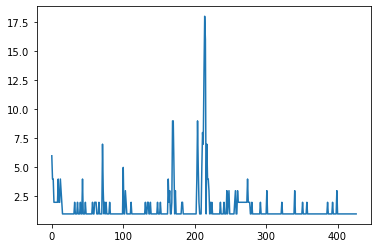

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

660

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.5456674473067915

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2447,16
1,2448,6
2,2449,2
3,2450,2
4,2451,6
...,...,...
196,2700,1
197,2701,2
198,2702,1
199,2703,3


<AxesSubplot:>

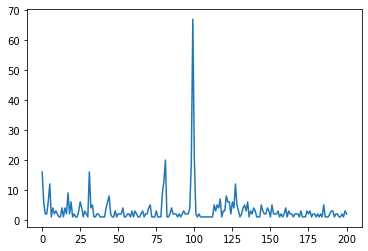

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

660

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

3.283582089552239

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,12.1,1,1635552000,2704
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.7,-1,1635465600,2704
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,10.1,-1,1635292800,2703
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.9,-1,1634947200,2703
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,95.8,1,1634860800,2703


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2447,40
1,2448,2
2,2449,0
3,2450,0
4,2451,8
...,...,...
196,2700,0
197,2701,1
198,2702,1
199,2703,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2447,17,0,0.5,2.500000
2448,1,0,0.0,0.333333
2449,0,0,0.0,0.000000
2450,0,0,0.0,0.000000
2451,4,0,0.0,1.333333
...,...,...,...,...
2700,0,0,0.0,0.000000
2701,1,0,0.5,0.500000
2702,1,1,1.0,1.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1218

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

1.8454545454545455

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2447,0
1,2448,0
2,2449,0
3,2450,0
4,2451,0
...,...,...
196,2700,0
197,2701,0
198,2702,0
199,2703,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2447,0,0,0.0,0.0
2448,0,0,0.0,0.0
2449,0,0,0.0,0.0
2450,0,0,0.0,0.0
2451,0,0,0.0,0.0
...,...,...,...,...
2700,0,0,0.0,0.0
2701,0,0,0.0,0.0
2702,0,0,0.0,0.0


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

251

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.3803030303030303

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2447,1266.8
1,2448,458.4
2,2449,30.0
3,2450,18.6
4,2451,264.6
...,...,...
196,2700,534.0
197,2701,55.8
198,2702,38.7
199,2703,106.8


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2447,356.2,7.1,36.75,79.175
2448,207.2,0.5,21.50,76.400
2449,15.0,15.0,15.00,15.000
2450,9.3,9.3,9.30,9.300
2451,114.2,3.8,14.30,44.100
...,...,...,...,...
2700,534.0,534.0,534.00,534.000
2701,43.3,12.5,27.90,27.900
2702,38.7,38.7,38.70,38.700


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

29748.8

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

45.07393939393939

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2447,1.000000
1,2448,0.333333
2,2449,1.000000
3,2450,1.000000
4,2451,1.000000
...,...,...
196,2700,1.000000
197,2701,0.000000
198,2702,1.000000
199,2703,-0.333333


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2447,1,1,1.0,1.000000
2448,1,-1,1.0,0.333333
2449,1,1,1.0,1.000000
2450,1,1,1.0,1.000000
2451,1,1,1.0,1.000000
...,...,...,...,...
2700,1,1,1.0,1.000000
2701,1,-1,0.0,0.000000
2702,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

562

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8515151515151516

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,12.1,1,1635552000,2704
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.7,-1,1635465600,2704
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,10.1,-1,1635292800,2703
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.9,-1,1634947200,2703
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,95.8,1,1634860800,2703


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,0.014396,1.0,1.000000,2704
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.000605,0.0,0.999444,2704
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,0.011977,0.0,0.998331,2703
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.000847,0.0,0.996107,2703
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,0.115654,1.0,0.995551,2703
...,...,...,...,...,...,...,...,...
655,"January 2, 2020",Great puzzle game with a neat back story. Nice...,0,0,0.102347,1.0,0.629032,2609
656,"December 31, 2019",Interesting game. You can be as creative as yo...,0,0,0.053835,1.0,0.627920,2608
657,"December 29, 2019","logical simple, simple logicalso meny ways to ...",0,0,0.043189,1.0,0.626808,2608
658,"December 28, 2019","if you liked The Witness, this game is for you",4,0,0.008105,1.0,0.626251,2608


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_26184/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",Feels like a 3D Factorio with levels instead o...,0,0,0.014396,1.0,1.000000,2704
1,"October 29, 2021",Ruined with blasphemy and profanity. For what ...,0,0,0.000605,0.0,0.999444,2704
2,"October 27, 2021",I would maybe recommend it if it's on sale and...,0,0,0.011977,0.0,0.998331,2703
3,"October 23, 2021","For the price, it's totally not worth it. Mayb...",0,0,0.000847,0.0,0.996107,2703
4,"October 22, 2021",This is a fun puzzle game with a fun story tho...,0,0,0.115654,1.0,0.995551,2703
5,"October 20, 2021",It reminds me of Rubik's Games from 1999.Puzzl...,1,0,0.046576,1.0,0.994438,2702
6,"October 13, 2021","After a lot of time with this game, this is an...",1,0,0.052141,1.0,0.990545,2701
7,"October 10, 2021",I found the levels got increasingly tedious in...,0,0,0.014880,0.0,0.988877,2701
8,"October 6, 2021",I really love this game. 3d world puzzle block...,0,0,0.645778,1.0,0.986652,2700
9,"September 25, 2021","A really polished, eraly assembly and design g...",0,0,0.311638,1.0,0.980534,2699


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2447    [Exactly the game that I was looking for. Mini...
2448    [Worst game ever do not buy., Worst game ever ...
2449    [So why did i gave this game a thumbs up?1. Ea...
2450    [i got a book on armpits from frankensteins fa...
2451    [Really great game, I recommend it to everyone...
2452    [One of the best puzzle games i've played. Its...
2453    [It can be really challenging, but like most p...
2454    [This is not your typical puzzle game. It's mu...
2455    [When I loaded the game and realized it was ma...
2456    [Needs a rewind button BIGLY, I like what i re...
2457    [The perfect game to explain/teach the princip...
2458    [You feel like you're not only solving a puzzl...
2459    [Incredible game that makes you feel like a pr...
2460    [good puzzle solving game. I find this much pr...
2461    [I thought this game was a puzzler, but it rea...
2463    [If you like logical puzzles, then you will pr...
2464    [I'm sorry, I can't bear seeing this game with..

In [52]:
# storing data in JSON format
df_text_list.to_json('infinifactory_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('infinifactory_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2447  [Exactly the game that I was looking for. Mini...
1    Review_Text   2448  [Worst game ever do not buy., Worst game ever ...
2    Review_Text   2449  [So why did i gave this game a thumbs up?1. Ea...
3    Review_Text   2450  [i got a book on armpits from frankensteins fa...
4    Review_Text   2451  [Really great game, I recommend it to everyone...
5    Review_Text   2452  [One of the best puzzle games i've played. Its...
6    Review_Text   2453  [It can be really challenging, but like most p...
7    Review_Text   2454  [This is not your typical puzzle game. It's mu...
8    Review_Text   2455  [When I loaded the game and realized it was ma...
9    Review_Text   2456  [Needs a rewind button BIGLY, I like what i re...
10   Review_Text   2457  [The perfect game to explain/teach the princip...
11   Review_Text   2458  [You feel like you're not only solving a puzzl...
12   Review_Text   2459  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('infinifactory_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_26184/1034450062.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('infinifactory_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_26184/3182843559.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('infinifactory_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])